In [1]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt

In [2]:
%matplotlib inline

In [4]:
Sales = pd.read_excel('SuperstoreSales.xls', index_col=0)


In [5]:
Sales.head()

,Order ID,Order Date,Order Priority,Order Quantity,Sales,Discount,Ship Mode,Profit,Unit Price,Shipping Cost,...,Zip Code,State,Region,Customer Segment,Product Category,Product Sub-Category,Product Name,Product Container,Product Base Margin,Ship Date
Row ID,,,,,,,,,,,,,,,,,,,,,
1,3,2010-10-13,Low,6,261.5400,0.04,Regular Air,-213.250,38.94,35.00,...,60035,Illinois,Central,Small Business,Office Supplies,Storage & Organization,"Eldon Base for stackable storage shelf, platinum",Large Box,0.80,2010-10-20
2,6,2012-02-20,Not Specified,2,6.9300,0.01,Regular Air,-4.640,2.08,2.56,...,98026,Washington,West,Corporate,Office Supplies,"Scissors, Rulers and Trimmers",Kleencut® Forged Office Shears by Acme United ...,Small Pack,0.55,2012-02-21
3,32,2011-07-15,High,26,2808.0800,0.07,Regular Air,1054.820,107.53,5.81,...,98387,Washington,West,Corporate,Furniture,Office Furnishings,Tenex Contemporary Contur Chairmats for Low an...,Medium Box,0.65,2011-07-17
4,32,2011-07-15,High,24,1761.4000,0.09,Delivery Truck,-1748.560,70.89,89.30,...,98387,Washington,West,Corporate,Furniture,Tables,KI Conference Tables,Jumbo Box,0.72,2011-07-16
5,32,2011-07-15,High,23,160.2335,0.04,Regular Air,-85.129,7.99,5.03,...,98387,Washington,West,Corporate,Technology,Telephones and Communication,Bell Sonecor JB700 Caller ID,Medium Box,0.60,2011-07-17


In [41]:
#Map the amount of high-priority shipments within 2010 on a timeline.
Sales['Ship Date'] = pd.to_datetime(Sales['Ship Date'])

In [42]:
new_sales = Sales[(Sales['Order Priority'] == 'High')&(Sales['Ship Date'] >= '2010-01-01') & (Sales['Ship Date'] <= '2010-12-31')]

In [74]:
shipment= new_sales['Order Priority'].groupby(new_sales['Ship Date']).count()

In [75]:
timeline = new_sales['Ship Date'].sort_values(ascending = True).unique()

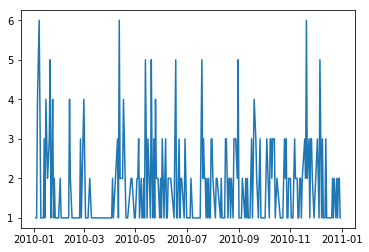

In [76]:
plt.plot(timeline,shipment)

In [77]:
#Graph out the minimum and maximum shipping costs per container type.

In [82]:
cost_minmum = Sales['Shipping Cost'].groupby(Sales['Product Container']).min()

In [83]:
cost_maxmum = Sales['Shipping Cost'].groupby(Sales['Product Container']).max()

In [79]:
containers = Sales['Product Container'].unique()

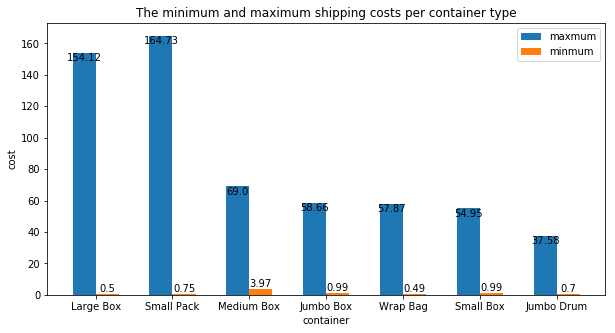

In [134]:
plt.subplots(figsize= (10, 5))
bar_width=0.3
plt.bar(x=range(len(containers)), height = cost_maxmum, label="maxmum", width=bar_width)
plt.bar(x=np.arange(len(containers))+bar_width,height = cost_minmum, label = "minmum", width=bar_width)
for x, y in enumerate(cost_maxmum):
    plt.text(x, y, '%s' % y, ha='center', va='top')
for x, y in enumerate(cost_minmum):
    plt.text(x+bar_width, y, '%s' % y, ha='center', va='bottom')
plt.title("The minimum and maximum shipping costs per container type")
plt.ylabel("cost")
plt.xticks(np.arange(len(containers))+bar_width/2, containers)
plt.xlabel("container")
plt.legend()

In [105]:
Sales.head()

,Order ID,Order Date,Order Priority,Order Quantity,Sales,Discount,Ship Mode,Profit,Unit Price,Shipping Cost,...,Zip Code,State,Region,Customer Segment,Product Category,Product Sub-Category,Product Name,Product Container,Product Base Margin,Ship Date
Row ID,,,,,,,,,,,,,,,,,,,,,
1,3,2010-10-13,Low,6,261.5400,0.04,Regular Air,-213.250,38.94,35.00,...,60035,Illinois,Central,Small Business,Office Supplies,Storage & Organization,"Eldon Base for stackable storage shelf, platinum",Large Box,0.80,2010-10-20
2,6,2012-02-20,Not Specified,2,6.9300,0.01,Regular Air,-4.640,2.08,2.56,...,98026,Washington,West,Corporate,Office Supplies,"Scissors, Rulers and Trimmers",Kleencut® Forged Office Shears by Acme United ...,Small Pack,0.55,2012-02-21
3,32,2011-07-15,High,26,2808.0800,0.07,Regular Air,1054.820,107.53,5.81,...,98387,Washington,West,Corporate,Furniture,Office Furnishings,Tenex Contemporary Contur Chairmats for Low an...,Medium Box,0.65,2011-07-17
4,32,2011-07-15,High,24,1761.4000,0.09,Delivery Truck,-1748.560,70.89,89.30,...,98387,Washington,West,Corporate,Furniture,Tables,KI Conference Tables,Jumbo Box,0.72,2011-07-16
5,32,2011-07-15,High,23,160.2335,0.04,Regular Air,-85.129,7.99,5.03,...,98387,Washington,West,Corporate,Technology,Telephones and Communication,Bell Sonecor JB700 Caller ID,Medium Box,0.60,2011-07-17


In [113]:
#Compare profits per category amongst the different regions.
regions = Sales['Region'].unique()


Profit
Region  Product Category               
Central Furniture          32442.474940
        Office Supplies   162819.102000
        Technology        286629.666400
East    Furniture          -5285.308659
        Office Supplies   138124.080500
        Technology        185013.272500
South   Furniture          41339.010000
        Office Supplies   113316.691500
        Technology        267851.410100
West    Furniture          48936.810000
        Office Supplies   103761.584000
        Technology        146819.166300

In [126]:
Furniture = Sales[Sales['Product Category'] == 'Furniture']
y1 = Furniture['Profit'].astype(int).groupby(Furniture['Region']).sum()
y1

Region
Central    32463
East       -5241
South      41334
West       48955
Name: Profit, dtype: int32

In [127]:
Office_Supplies = Sales[Sales['Product Category'] == 'Office Supplies']
y2 = Office_Supplies['Profit'].astype(int).groupby(Office_Supplies['Region']).sum()
y2

Region
Central    162853
East       138154
South      113327
West       103818
Name: Profit, dtype: int32

In [128]:
Technology = Sales[Sales['Product Category'] == 'Technology']
y3 = Technology['Profit'].astype(int).groupby(Technology['Region']).sum()
y3

Region
Central    286563
East       184996
South      267827
West       146774
Name: Profit, dtype: int32

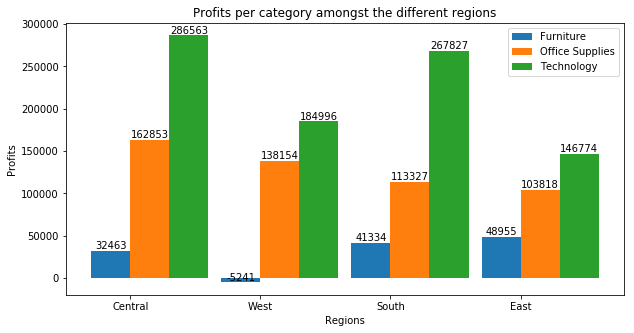

In [135]:
bar_width=0.3
plt.subplots(figsize= (10, 5))
plt.bar(x=range(len(regions)), height = y1, label="Furniture", width=bar_width)
plt.bar(x=np.arange(len(regions))+bar_width,height = y2, label = "Office Supplies", width=bar_width)
plt.bar(x=np.arange(len(regions))+bar_width+bar_width,height = y3, label = "Technology", width=bar_width)
for x, y in enumerate(y1):
    plt.text(x, y, '%s' % y, ha='center', va='bottom')
for x, y in enumerate(y2):
    plt.text(x+bar_width, y, '%s' % y, ha='center', va='bottom')
for x, y in enumerate(y3):
    plt.text(x+bar_width+bar_width, y, '%s' % y, ha='center', va='bottom')

plt.title("Profits per category amongst the different regions")   
plt.ylabel("Profits")
plt.xticks(np.arange(len(regions))+bar_width/2, regions)
plt.xlabel("Regions")
plt.legend()